In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline

   size      mean       std
0    1K  1.109474  0.838388
1   50K  2.892632  0.736779
2  100K  5.558421  1.138909


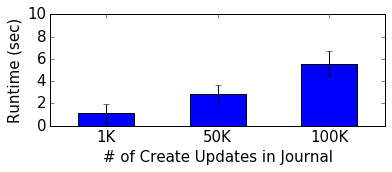

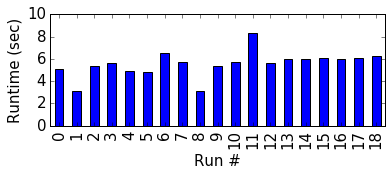

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(6,2))

df = pd.DataFrame(columns=["size", "mean", "std"])
with open('experiments/merge/results/summary-1k') as f:
    d = pd.read_csv(f, names=['time'])
df.loc[len(df)] = ["1K", float(d.mean()), float(d.std())]

with open('experiments/merge/results/summary-50k') as f:
    d = pd.read_csv(f, names=['time'])
df.loc[len(df)] = ["50K", float(d.mean()), float(d.std())]

with open('experiments/merge/results/summary-100k') as f:
    d = pd.read_csv(f, names=['time'])
df.loc[len(df)] = ["100K", float(d.mean()), float(d.std())]

df.plot.bar(ax=ax, y='mean', yerr='std')
ax.set_xticklabels(df['size'], rotation=0)
ax.legend().remove()
ax.set_ylabel("Runtime (sec)")
ax.set_ylim(0, 10)
ax.set_xlabel("# of Create Updates in Journal")
fig.savefig('paper/graphs/merge-a.png',  bbox_inches='tight',  dpi=400)
print df

fig, ax = plt.subplots(1, 1, figsize=(6,2))
with open('experiments/merge/results/summary-100k') as f:
    d = pd.read_csv(f, names=['time'])
d.plot.bar(ax=ax)
ax.legend().remove()
#ax.legend(fontsize=11, loc='lower right', ncol=2)
font = {'size'   : 15}
matplotlib.rc('font', **font)
ax.set_ylabel("Runtime (sec)")
ax.set_xlabel("Run #")
ax.set_ylim(0, 10)
fig.savefig('paper/graphs/merge-b.png', bbox_inches='tight', dpi=400)